## <center> CSCI3151 : Sci Tutorial - 2</center>
<center>Author: Sima Rezaeipour, Amir Khaleghi, <b><i>amir.k@dal.ca.</i></b> </center>

This is a tutorial on fundamental ideas of <a href ="https://scikit-learn.org/stable/tutorial/basic/tutorial.html"> SKlearn </a>. This tutorial focuses on working with text data. This notes is just a starting point. You are encouraged to find out more. The ideal use of this notebook would be as a reference which you keep updating as you learn new things. You can reach me for further questions at <b><i>amir.k@dal.ca.</i></b>

<b>Credits:</b> Content presented in this tutorial is based on the example presented in [Scikit-learn Tutorial](https://www.dataquest.io/blog/sci-kit-learn-tutorial/)



## SkLearn ## 

![Image](https://i.ibb.co/S0mt33d/sk.png)


Scikit-learn is an open source (free) machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like NumPy and SciPy.

All the models follow the same pattern of training and testing:
1. Choose and instantiate a model : model = ...
2. Train the model: model.fit(X,y) [You need to pass y if it is supervised]
3. Test the model: model.predict(X) 
    * This will be a real number if it is regression.
    * Class label if it is classification.
    * Cluster assignment if it is clustering. 

###  <a href ="https://www.dataquest.io/blog/sci-kit-learn-tutorial/"> Example 1 (Classification) </a> 
#### [Dataset](https://www.youtube.com/watch?v=H_3UdneAJU0): 
In this example, we will use <a href ="https://www.ibm.com/cloud/garage/dte/producttour/sales-planning">  Sales_Win_Loss </a> dataset from IBM's Watson repository. This data set contains the sales campaign data of an automotive parts wholesale supplier.
It finds the patterns in sales wins and losses. It helps you to understand your sales pipeline and uncover what can lead to successful sales opportunities and better anticipate performance gaps.

By exploring the data, you can gain this information:
- What are the top supplies group by opportunity amount where result is won?
- Top Route to Market by Opportunity Size.
-  Use Predict to determine what the main drivers are for Opportunity Result where there is a win?  
- Comparison of the number of Wins and Losses in a bar chart, Bubble chart comparing Supplies Group by Opportunity Amount and a Bubble Chart comparing Competitor Type by Opportunity Amount in a single dashboard.  



**Using scikit-learn we can build a predictive model to tell us which sales campaign will result in a loss and which will result in a win.**

#### Download the dataset and convert it into a pandas dataframe

In [0]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import io
import requests
url = 'https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv'
s=requests.get(url).content
sales_data = pd.read_csv(io.StringIO(s.decode('utf-8')))
#sales_data = pd . read_csv ('Sales_Win_Loss.csv')
sales_data.head()

Opportunity Number  ... Deal Size Category
0             1641984  ...                  1
1             1658010  ...                  1
2             1674737  ...                  1
3             1675224  ...                  1
4             1689785  ...                  4

[5 rows x 19 columns]

In [0]:
sales_data.tail(n=3)

Opportunity Number  ... Deal Size Category
78022            10090145  ...                  4
78023            10090430  ...                  5
78024            10094255  ...                  4

[3 rows x 19 columns]

As you can see in the dataset, *Opportunity Result* field could be our *Target*, in this way, our problem is a **binary classification** task, containing two classes: Loss and Won.

**Available different datatypes in this data set:**

In [0]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

####Data Visualization


<a href = "https://seaborn.pydata.org/"> Seaborn</a> is a high-level plotting library for Python which is closely integrated with pandas data structures.
To use Seaborn plots, we should make sure that this python module is downloaded and installed.

Seaborn builds on <a href = "https://matplotlib.org/"> matplotlib</a>  and makes certain types of plots.

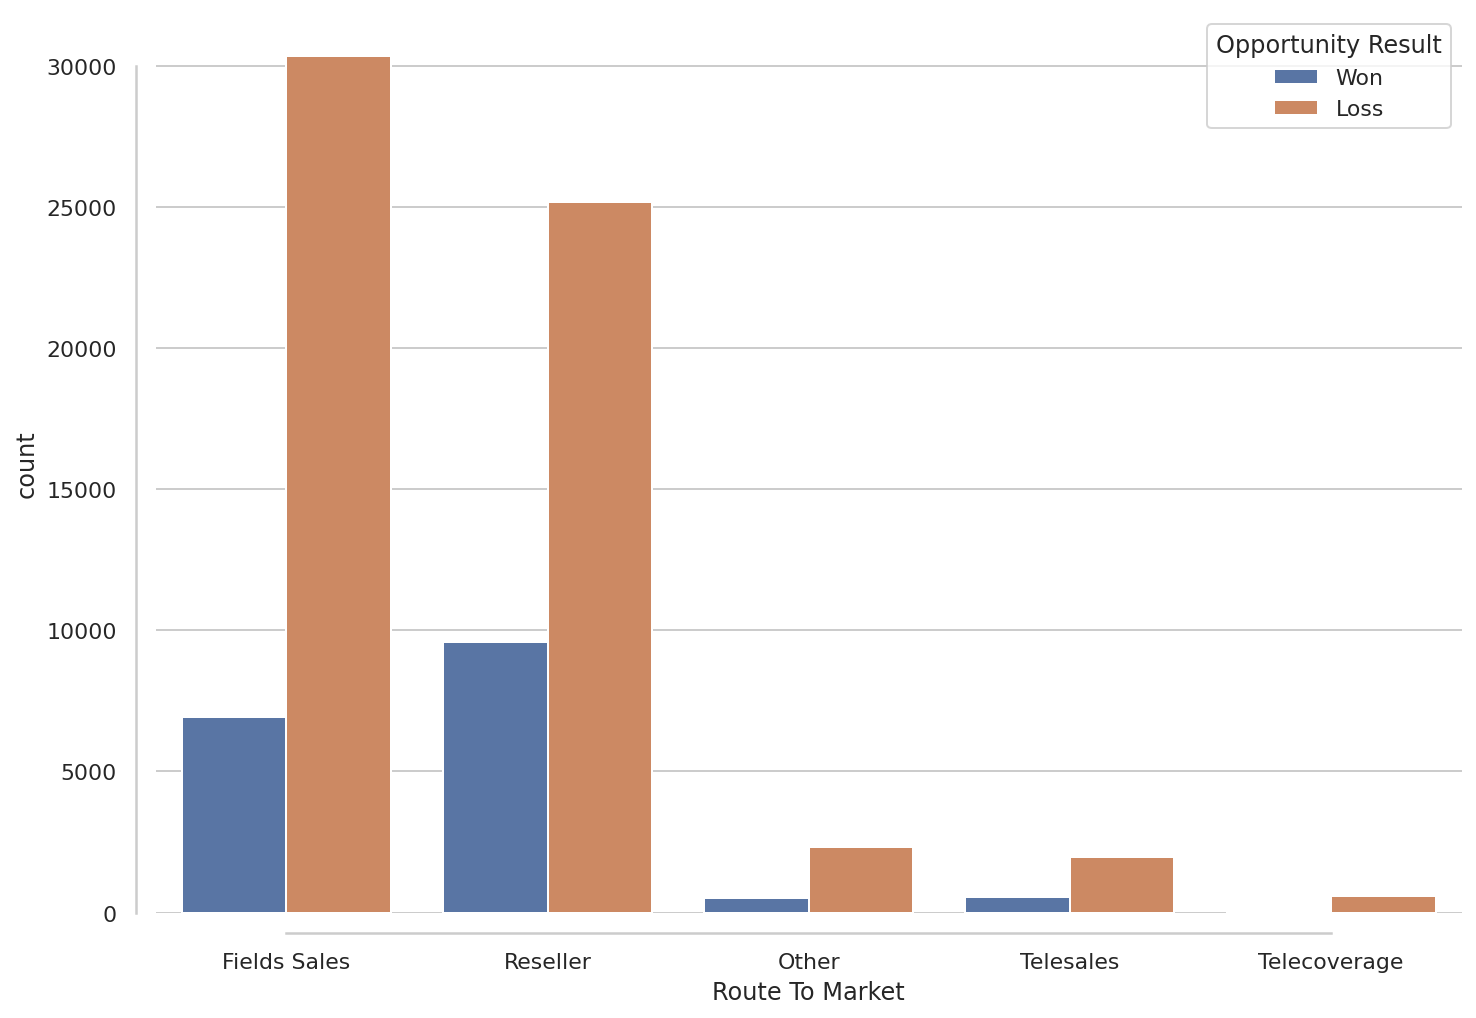

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.testing as tm

# set the background colour of the plot to white
sns.set(style="whitegrid",rc={'figure.figsize':(11.7,8.27)})

# create a countplot
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

# Remove the top and down margin
sns.despine(offset=10, trim=True)

# display the plot
plt.show()


*   The ***set()*** method set different properties for our plot, like 'styles', 'color' etc. 
*   For example, we can set the plot size with the ***sns.set ( rc = {'figure.figsize' : (11.7,8.27) } )*** code, which defines the plot figure size to be 11.7px and 8.27px.
*   The ***countplot()*** method helps us to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) and it exposes several arguments to customize the countplot per our needs. 





**Practice 1**

*   Using the Sales Win Loss dataset, create a scatterplot with "Region" and "Sales Stage Change Count" as X and Y axis and "Deal Size Category" as hue.



#### Preprocessing Data:

*   That most of the columns in our data set are strings, but the algorithms in scikit-learn understand only numeric data.
*   **[LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)** is a method for converting string data into numerical data. 
*   We will use this method to convert the categorical labels in our data set like 'won' and 'loss' into numerical labels.
*   We will use the **fit_transform()** method provided by  **LabelEncoder()** to encode the labels in the categorical column such as *Route To Market* in the sales_data dataframe and convert them into numeric labels.


*   In the code example below we have a list of cities i.e.*["paris", "paris", "tokyo", "amsterdam"]* and we will try to encode these string labels into something similar to this - *[1 1 2 0].*

In [0]:
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

print(encoded_value)

[1 1 2 0]


In the previous sections during the initial exploration of the data set we saw that the following columns contain string values: *'Supplies Subgroup', 'Region', 'Route To Market', 'Opportunity Result', 'Competitor Type',* and *'Supplies Group'*. 

Before we start encoding these string labels, let's take a quick look into the different labels that these columns contain:

In [0]:
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


It's time to encode these strings into numeric labels:

In [0]:
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

sales_data.head()

Opportunity Number  ...  Deal Size Category
0             1641984  ...                   1
1             1658010  ...                   1
2             1674737  ...                   1
3             1675224  ...                   1
4             1689785  ...                   4

[5 rows x 19 columns]

#### Training Set & Test Set



*   We need to divide the entire data set into two sets, **train** and **test** set. 
# Why?



> First we separate our features and target variables.
*   We want to predict the *'Opportunity Result'*, so it should be our *'Target'* rather than part of *'data'*.
*   We took the '*Opportunity Result*' column from the dataframe *sales_data* and created a new dataframe *target.*





In [0]:
#select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

#dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]

#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

data.head(n=2)


Supplies Subgroup  ...  Deal Size Category
0                  2  ...                   1
1                  2  ...                   1

[2 rows x 17 columns]

#### [Normalizing the data](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

*   Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).
* This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as K-Nearest Neighbors.


In [0]:
from sklearn.preprocessing import Normalizer
# Normalization is applied only on the data not the target
scaler = Normalizer().fit(data) # creating a scaler for the normalizer based on the data
normalized_data = scaler.transform(data) # transforming the data into the normalization scale

The [**train_test_split()**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method can be used to split the data:
- When splitting the data set we will keep 30% of the data as the test data and the remaining 70% as the training data. 

In [0]:
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(normalized_data,target, test_size = 0.30, random_state = 10)


In [0]:
data_train

array([[5.99989167e-04, 1.99996389e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.99996389e-04],
       [2.33408747e-03, 9.33634988e-04, 1.86726998e-03, ...,
        4.66817494e-04, 0.00000000e+00, 4.66817494e-04],
       [7.99920085e-04, 0.00000000e+00, 1.19988013e-03, ...,
        2.85685459e-05, 1.14274384e-04, 1.99980021e-04],
       ...,
       [9.99858270e-04, 3.99943308e-04, 7.99886616e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.99971654e-04],
       [0.00000000e+00, 0.00000000e+00, 2.15916759e-02, ...,
        2.15916759e-02, 0.00000000e+00, 2.15916759e-02],
       [1.30208332e-05, 5.20833330e-06, 1.56249999e-05, ...,
        2.07578384e-06, 0.00000000e+00, 1.56249999e-05]])

In [0]:
target_train

58546    0
38963    1
56239    0
18336    0
73136    0
        ..
17904    0
37597    1
10201    0
9372     1
50496    1
Name: Opportunity Result, Length: 54617, dtype: int64

#### Building The Model



**Use different algorithms to make predictions and compare their performance:**


1.   Naive-Bayes
2.   LinearSVC
3.   K-Nearest-Neighbors (kNN)



* Let's implement the [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) or GaussianNB algorithm to create our prediction model:

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
gnb = GaussianNB()

#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())

#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))


Naive-Bayes accuracy :  0.7667036910457963


* Now lets see how the other algorithms in our list perform as compared to the Naive-Bayes algorithm:


* [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class.

In [0]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))


LinearSVC accuracy :  0.7721291866028708


 * Simply put the ***random_state*** is an instruction to the built-in random number generator to shuffle the data in a specific order to make results reproducible.

* Compared to the previous two algorithms, [K-Nearest-Neighbor Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is a bit more complex since it's a non-linear calssifier [why?](https://stats.stackexchange.com/questions/178522/why-knn-is-a-non-linear-classifier).

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm
neigh.fit(data_train, target_train)

# predict the response
pred = neigh.predict(data_test)

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8080143540669856


**Practice 2**
* Using the same dataset, calculate the accuracy score for Logistic Regression and Random Forest classifier (both are available in scikit package)

## Visualizations 

There are several visualization tools in Python that we can use to <a href ="https://www.dataquest.io/blog/python-data-visualization-libraries/"> visualize </a>    data. You may use any of them in your assignments to depict the results of your codes.

In order to visually compare the performance of the different models, we can use [yellowbrick](http://www.scikit-yb.org/en/latest/) library,  which provides methods for visually representing different scoring methods.



#### Performance Comparison

We have used the **accuracy_score()** method to measure the accuracy of the different algorithms. 

Now, we will use the **[ClassificationReport](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)** class to give us a visual report of how our models perform.

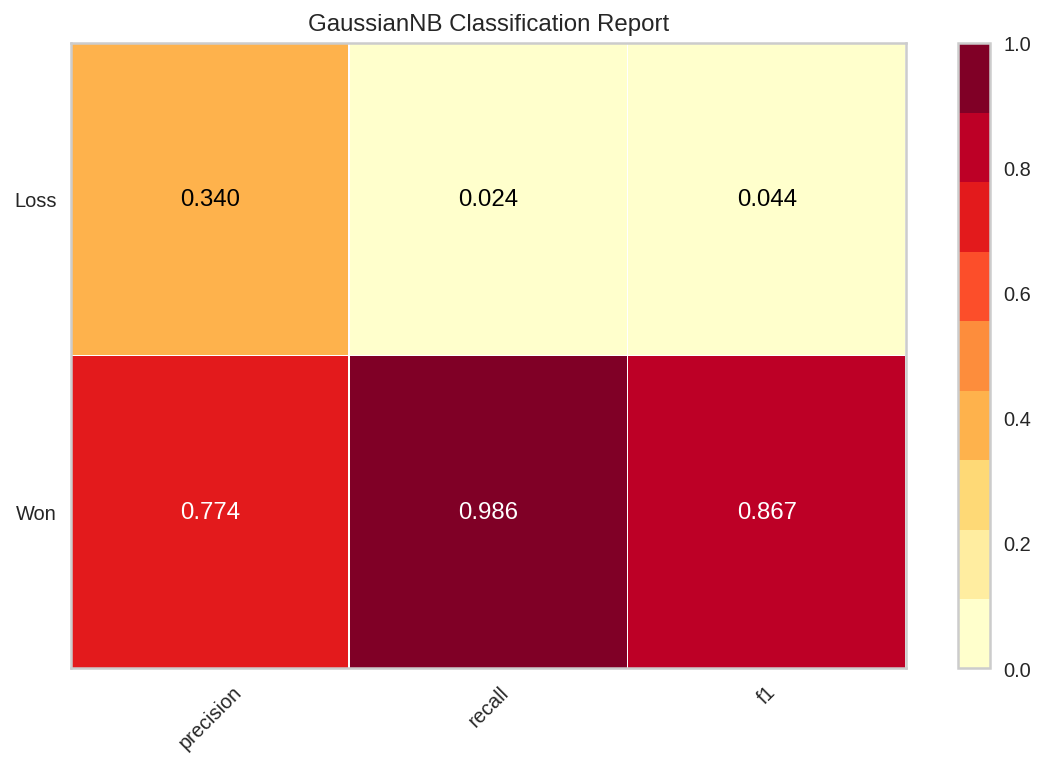

In [0]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()  

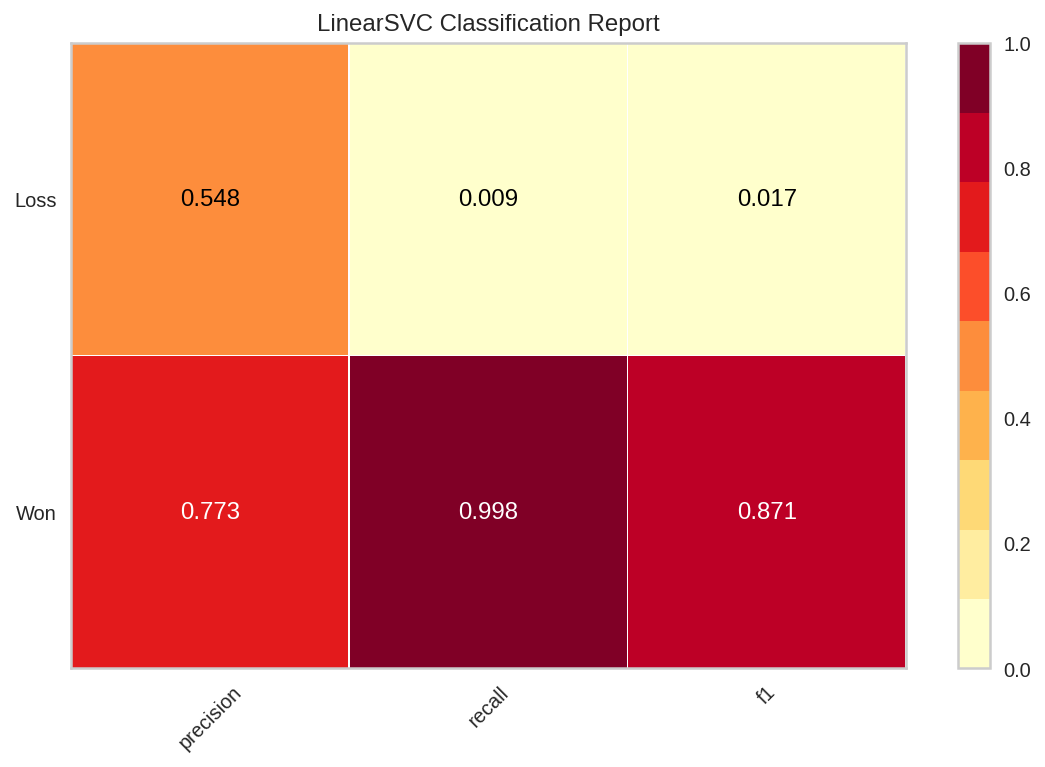

In [0]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()  

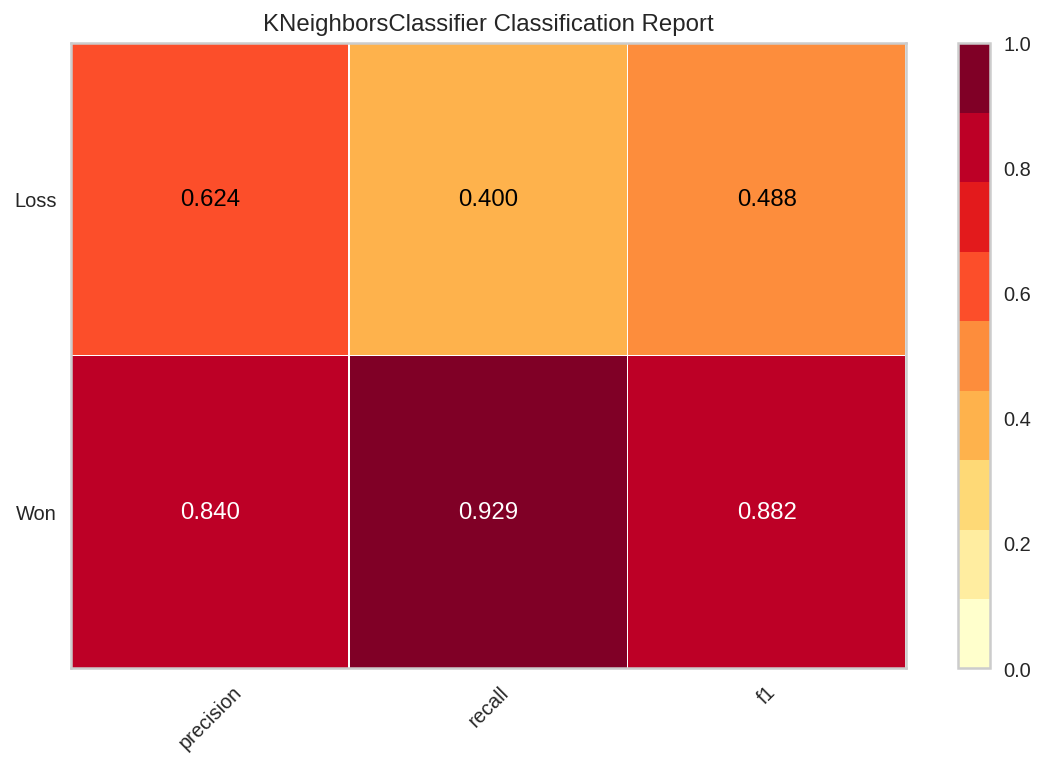

In [0]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # Fit the training data to the visualizer
visualizer.score(data_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


In [0]:
# For calculating each score individually
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, precision_score, recall_score
model = LinearSVC(random_state=42)
model.fit(data_train, target_train)
predict = model.predict(data_test)
print("Precision score: ", precision_score(target_test,predict))
print("Recall score: ", recall_score(target_test,predict))
print("F1 score: ", f1_score(target_test,predict))

Precision score:  0.5476190476190477
Recall score:  0.008611007113440658
F1 score:  0.016955399926280867


### Confusion Matrix

*   A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) is a summary of prediction results on a classification problem.
*    Is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives.

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))
y_predNB_train = gnb.predict(data_train)

print('Accuracy of NB classifier on test set: {:.2f}'.format(accuracy_score(target_test, pred))) 
print('Accuracy of NB classifier on train set: {:.2f}'.format(accuracy_score(target_train, y_predNB_train)))
confusion_matrixNB = confusion_matrix(target_test, pred)
print(confusion_matrixNB)

Naive-Bayes accuracy :  0.7667036910457963
Accuracy of NB classifier on test set: 0.77
Accuracy of NB classifier on train set: 0.77
[[17821   245]
 [ 5216   126]]


### [Plot](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) Confusion Matrix 

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


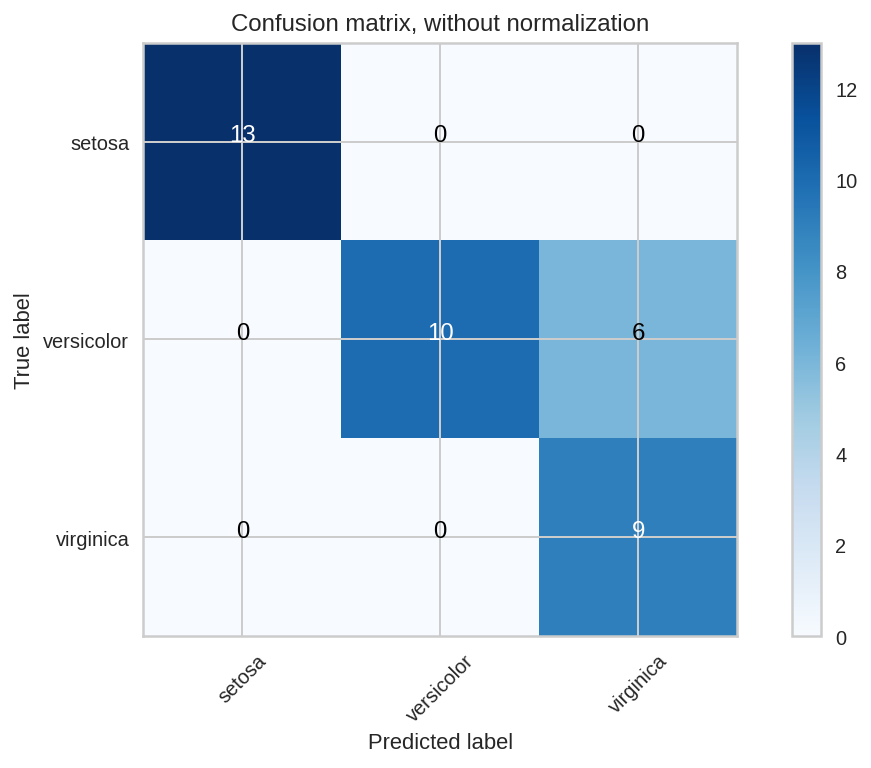

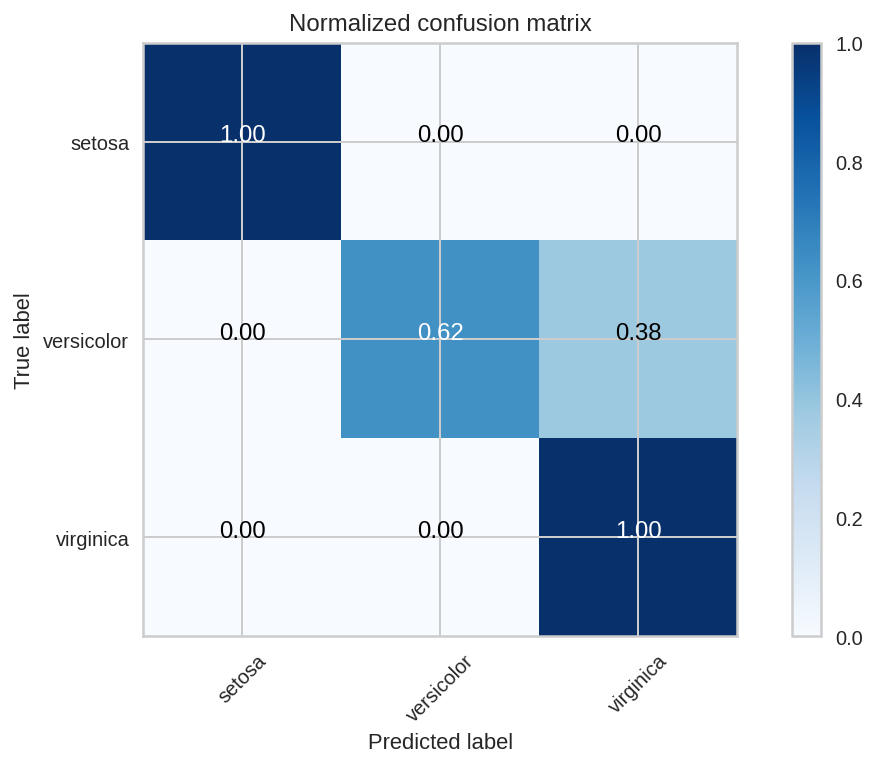

In [0]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

###[Cross-validation using SkLearn](https://scikit-learn.org/stable/modules/cross_validation.html):

*    [Cross-validation](https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html) is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. 
*     It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.





![Image](https://i.ibb.co/ByqrGyp/cv.png)

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores


array([0.97, 1.  , 0.97, 0.97, 1.  ])

###[K-Fold Cross Validation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

*  In K-Fold Cross Validation we split our data into k different subsets (or folds). 

![Image](https://i.ibb.co/VDPD5PL/cv2.png)

In [0]:
from sklearn.model_selection import KFold
iris = datasets.load_iris()
X = iris.data
y = iris.target
kf = KFold(n_splits=2) 
kf.get_n_splits(X) 
KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]


TRAIN: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] TEST: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 1

**Practice 3**

*   For the iris dataset, implement a 5-fold cross validation and plot the confusion matrix of each fold



#Example 2 (Regression):
This data comes from a Kaggle competition named “House Prices: Advanced Regression Techniques”. It contains 1460 training data points and 80 features that might help us predict the selling price of a house. You can find the dataset and its descriptions [here](https://www.kaggle.com/alphaepsilon/housing-prices-dataset) 


####Load the data:

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [0]:
train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

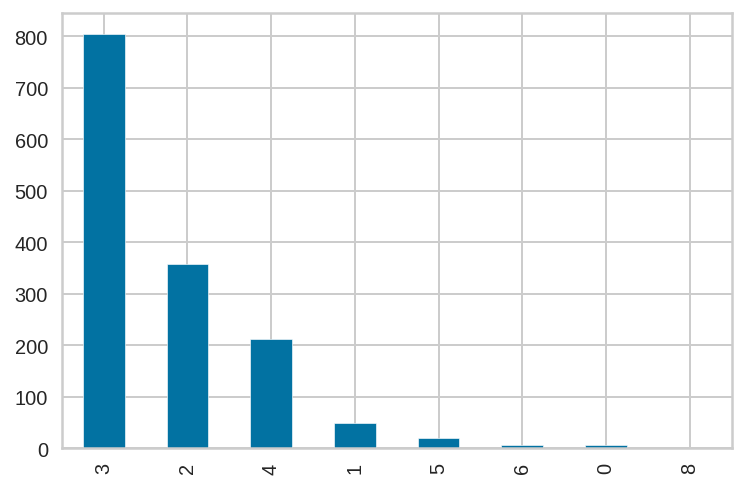

In [0]:
import matplotlib.pyplot as plt
train['BedroomAbvGr'].value_counts().plot(kind= 'bar')

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 2 bedroom

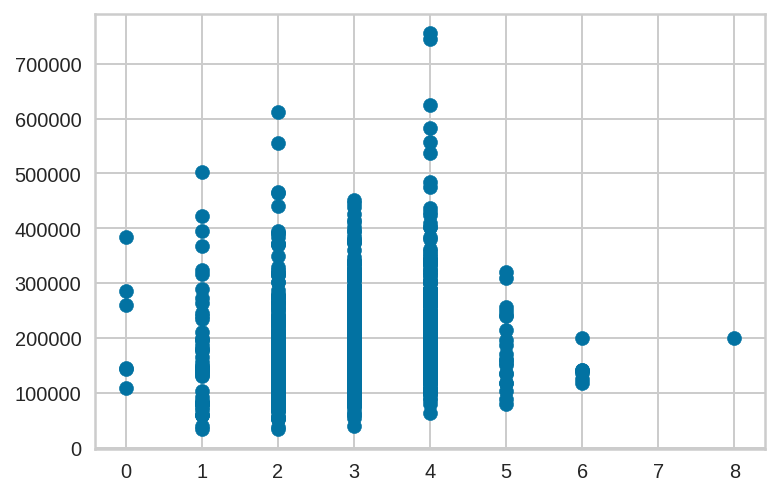

In [0]:
plt.scatter(train['BedroomAbvGr'],train['SalePrice'])

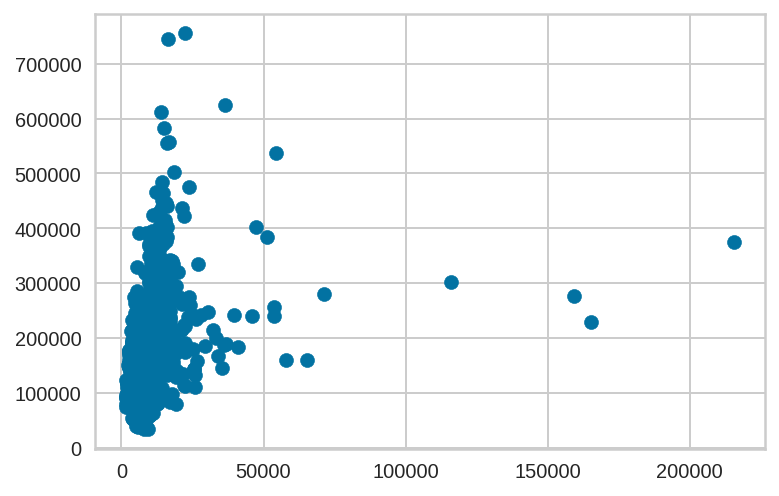

In [0]:
plt.scatter(train['GarageArea']+ train['LotArea'],train['SalePrice'])

In [0]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [0]:
all_data.head()

MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
0          60       RL         65.0  ...    2008       WD        Normal
1          20       RL         80.0  ...    2007       WD        Normal
2          60       RL         68.0  ...    2008       WD        Normal
3          70       RL         60.0  ...    2006       WD       Abnorml
4          60       RL         84.0  ...    2008       WD        Normal

[5 rows x 79 columns]

##Data preprocessing:
We're not going to do anything fancy here:

First we'll transform the skewed numeric features [<a href=https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0>why?</a>] by taking log(feature + 1) [<a href="https://stackoverflow.com/questions/49538185/what-is-the-purpose-of-numpy-log1p">see here for mor information</a>] - this will make the features more likely to follow a Normal distribution.
Create Dummy variables for the categorical features
Replace the numeric missing values (NaN's) with the mean of their respective columns.
More information about skewness can be found [here](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65ea489fd0>,
      dtype=object)

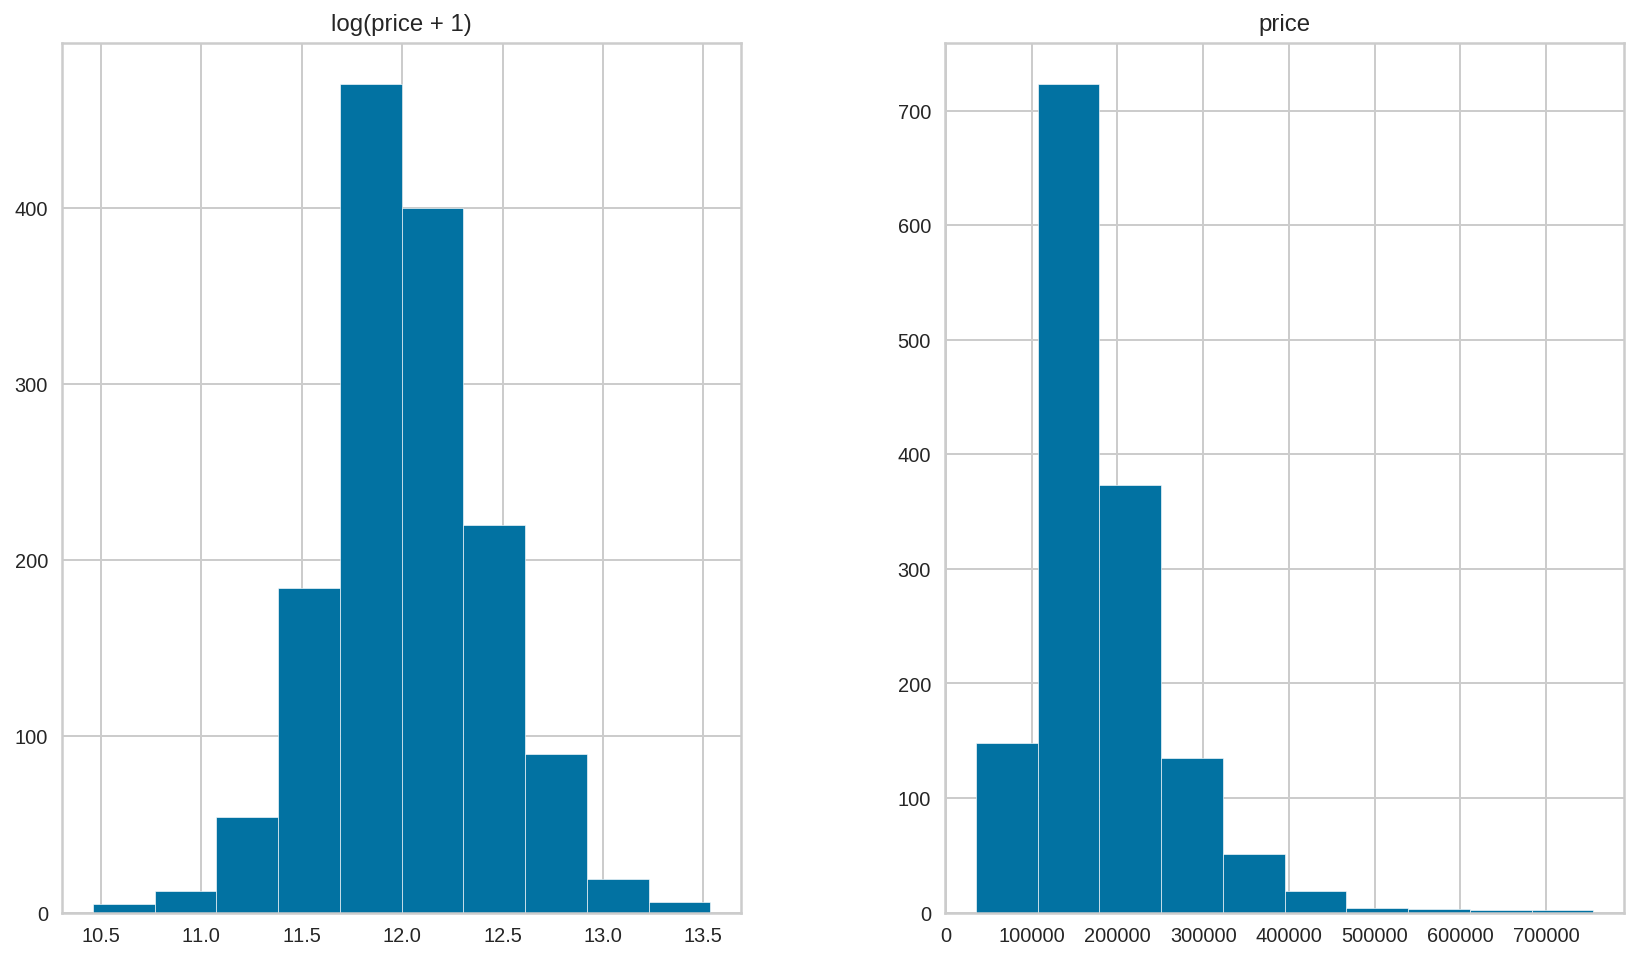

In [0]:
matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [0]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

#Here is a short video on how to calculate the skewnes in theory https://www.youtube.com/watch?v=5HUZe_QXXww

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

#The goal is to log transform features that have a highly skewed distribution (skew > .75)
skewed_feats = skewed_feats[skewed_feats > 0.75]

skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [0]:
#Converting categorical variable into dummy/indicator variables. check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [0]:
all_data.head()

MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0    4.110874     4.189655  ...                     1                      0
1    3.044522     4.394449  ...                     1                      0
2    4.110874     4.234107  ...                     1                      0
3    4.262680     4.110874  ...                     0                      0
4    4.110874     4.442651  ...                     1                      0

[5 rows x 288 columns]

In [0]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

##Models
Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization.

A detailed explanation of why we are using these models and their differences can be found [here](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b).

In [0]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

#A function that calculates root means squared of a five fold cross validation on the model
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [0]:
model_ridge = Ridge()

In [0]:
# see 
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

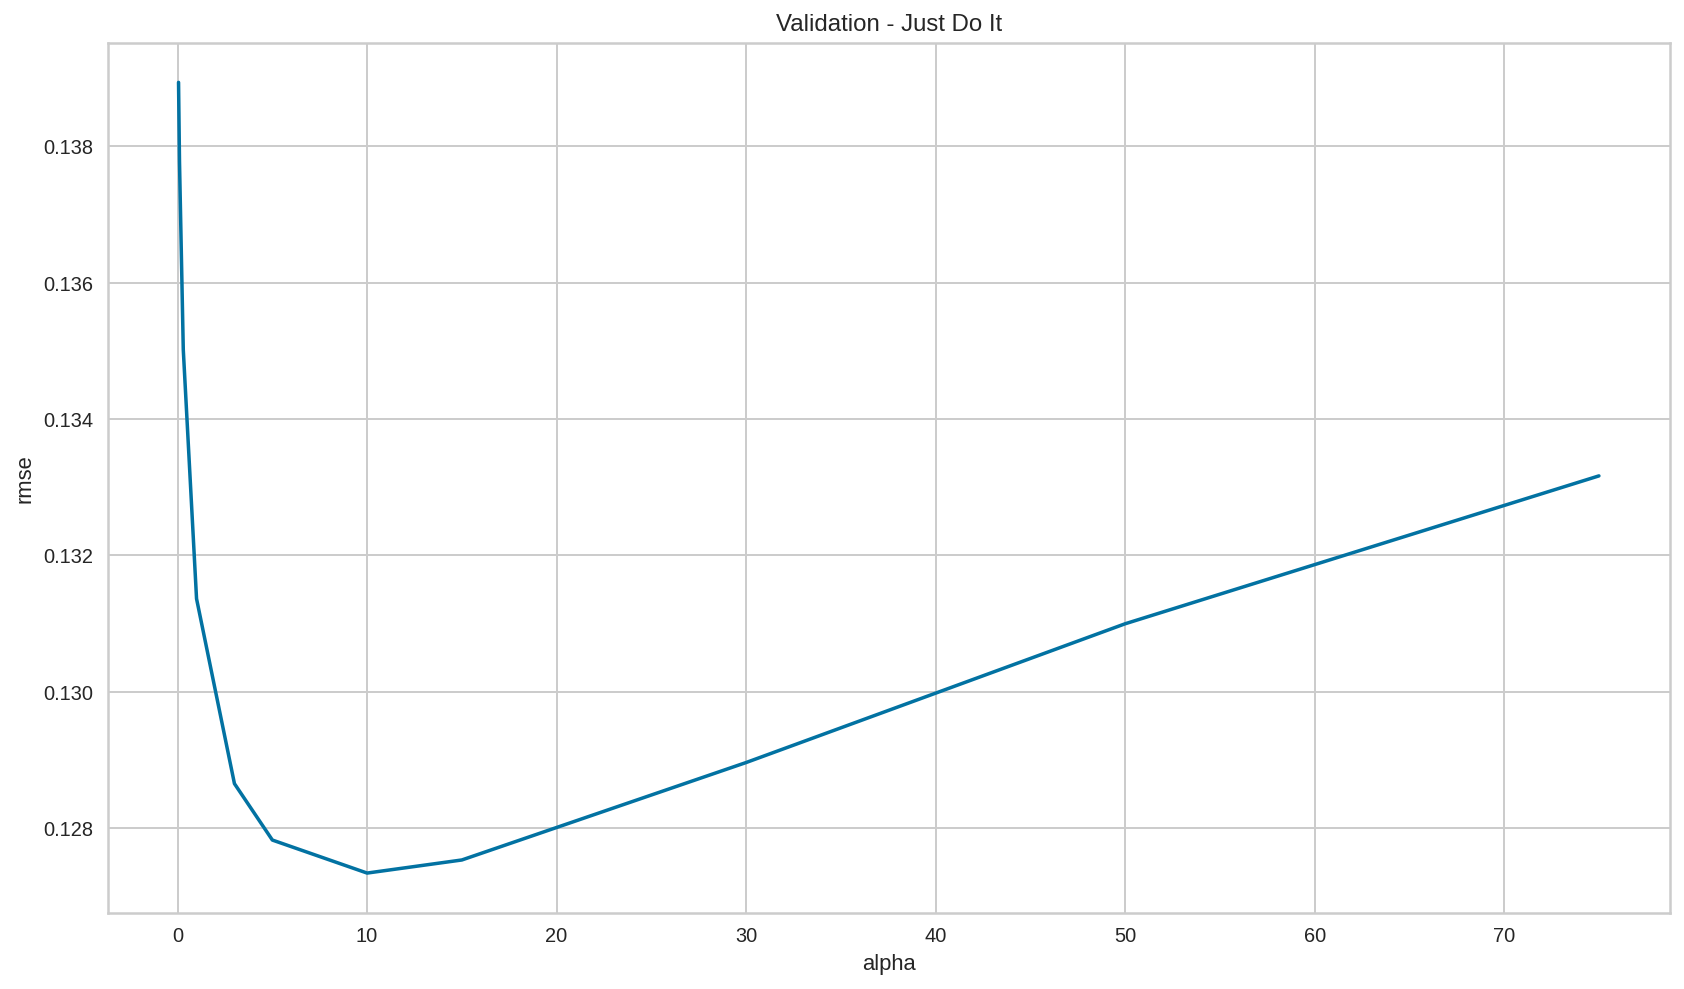

In [0]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [0]:
cv_ridge.min()


0.12733734668670757

In [0]:
# Ridge predictions
model_ridge.fit(X_train,y)
predicted_values = model_ridge.predict(X_test)
predicted_values

array([11.7 , 11.94, 12.13, ..., 12.07, 11.69, 12.3 ])

In [0]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [0]:
rmse_cv(model_lasso).mean()


0.12256735885048142

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


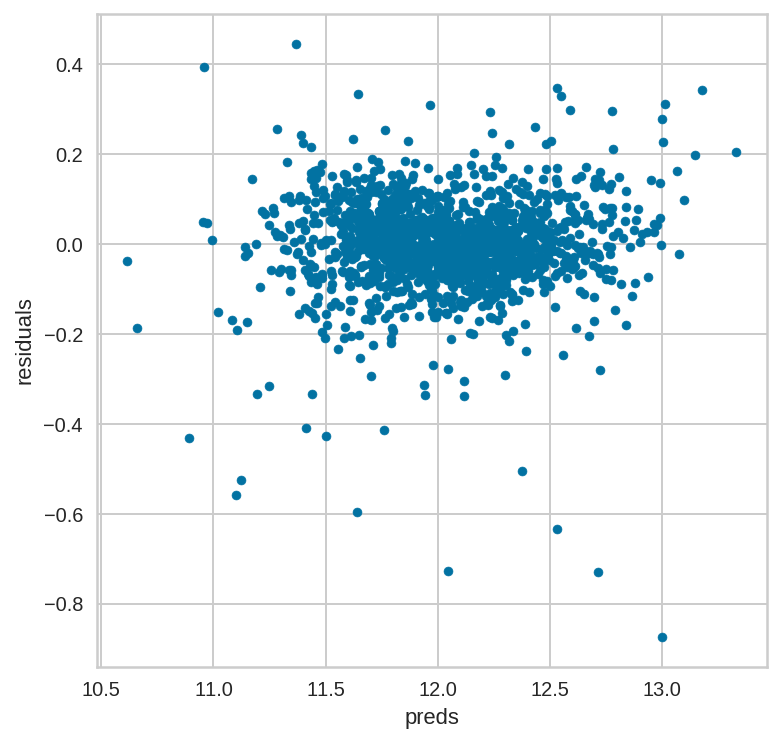

In [0]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

***Practice 4***
* Using [scikit's diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), implement preprocessing steps and implement lasso and ridge model